In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

### 1. Data

In [97]:
df = pd.read_csv("data/hien_data.csv", index_col=0)
df["profitability"] = df.gross / (df.budget + 1) # avoid budget = 0
df = df.drop([*df.select_dtypes(['object']).columns, "gross"], axis=1) # drop all the qualitative columns

In [99]:
df.dtypes

num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_1_facebook_likes       float64
num_voted_users                int64
cast_total_facebook_likes      int64
facenumber_in_poster         float64
num_user_for_reviews         float64
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
movie_facebook_likes           int64
Biography                      int64
Comedy                         int64
Crime                          int64
Drama                          int64
Romance                        int64
Mystery_Thriller_Horror        int64
Sci-Fi_Fantasy                 int64
Family_Animation               int64
Action_Adventure               int64
History_War                    int64
Others                         int64
profitability                float64
dtype: object

In [100]:
X = df.loc[:, ~df.columns.isin(["imdb_score", "profitability"])]
y1 = df[["imdb_score"]]
y2 = df[["profitability"]]

In [101]:
X

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,...,Comedy,Crime,Drama,Romance,Mystery_Thriller_Horror,Sci-Fi_Fantasy,Family_Animation,Action_Adventure,History_War,Others
0,125.0,123.0,446.0,821.0,20000.0,64595,22209,1.0,316.0,48000000.0,...,1,0,0,1,0,1,0,0,0,0
1,134.0,88.0,104.0,318.0,628.0,160281,2726,0.0,427.0,3500000.0,...,1,0,0,0,0,0,0,0,0,0
2,36.0,104.0,116.0,83.0,1000.0,50125,1662,0.0,140.0,4500000.0,...,0,0,1,1,0,0,0,1,0,0
3,125.0,148.0,644.0,326.0,1000.0,142448,2566,1.0,319.0,27000000.0,...,1,1,0,0,0,0,0,1,0,1
4,71.0,98.0,11000.0,484.0,13000.0,81599,14921,3.0,250.0,6000000.0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3873,159.0,81.0,26.0,300.0,2000.0,13523,3344,0.0,95.0,4900000.0,...,0,0,0,0,1,0,0,0,0,0
3874,29.0,120.0,18.0,295.0,634.0,4501,1810,11.0,102.0,5000000.0,...,0,0,1,0,0,0,0,0,0,0
3875,12.0,96.0,23.0,503.0,927.0,1180,3552,6.0,9.0,5000000.0,...,1,0,0,1,0,0,0,0,0,0
3876,2.0,115.0,32.0,29.0,14000.0,90,14133,1.0,1.0,12620000.0,...,0,0,1,0,0,0,0,1,1,0


In [102]:
X_stats = X.describe().transpose()
def norm(x):
    return (x - X_stats["mean"])/X_stats["std"]

normed_X = norm(X)

In [103]:
normed_X.keys()

Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'num_voted_users',
       'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'title_year',
       'actor_2_facebook_likes', 'movie_facebook_likes', 'Biography', 'Comedy',
       'Crime', 'Drama', 'Romance', 'Mystery_Thriller_Horror',
       'Sci-Fi_Fantasy', 'Family_Animation', 'Action_Adventure', 'History_War',
       'Others'],
      dtype='object')

In [104]:
X_train, X_test, y_train, y_test = train_test_split(normed_X, y1, test_size=0.33, random_state=42)
# train_dataset = tf.data.Dataset.from_tensor_slices((np.array(X_train), np.array(y2_train)))
# test_dataset = tf.data.Dataset.from_tensor_slices((np.array(X_test), np.array(y2_test)))

### 2. Predict IMDB Scores

In [33]:
import tensorflow as tf
import tensorflow.keras as tfk
import tensorflow.keras.layers as tfkl
import tensorflow_probability as tfp

In [34]:
model = tfk.Sequential([
    #tfk.Input(shape=(25,)),
    #tfkl.BatchNormalization(), # normalise data here
    tfkl.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
    tfkl.Dense(32, activation='relu'),
    tfkl.Dense(1)
])

In [35]:
model.compile(optimizer=tf.optimizers.Adam(1e-4), loss=tfk.losses.mean_squared_error, metrics=["mse", "mae"])

In [36]:
model.fit(np.array(X_train), np.array(y_train), validation_split=0.2, batch_size=100, 
          epochs=500, workers=10, use_multiprocessing=True)

Train on 2078 samples, validate on 520 samples
Epoch 1/500
2078/2078 [==============================] - 0s 198us/sample - loss: 39.7509 - mse: 39.7509 - mae: 6.1989 - val_loss: 38.3394 - val_mse: 38.3394 - val_mae: 6.0872
Epoch 2/500
2078/2078 [==============================] - 0s 24us/sample - loss: 37.7881 - mse: 37.7881 - mae: 6.0416 - val_loss: 36.4475 - val_mse: 36.4475 - val_mae: 5.9325
Epoch 3/500
2078/2078 [==============================] - 0s 25us/sample - loss: 35.8519 - mse: 35.8519 - mae: 5.8817 - val_loss: 34.5808 - val_mse: 34.5808 - val_mae: 5.7750
Epoch 4/500
2078/2078 [==============================] - 0s 22us/sample - loss: 33.9487 - mse: 33.9487 - mae: 5.7193 - val_loss: 32.7096 - val_mse: 32.7096 - val_mae: 5.6119
Epoch 5/500
2078/2078 [==============================] - 0s 24us/sample - loss: 32.0543 - mse: 32.0543 - mae: 5.5525 - val_loss: 30.8290 - val_mse: 30.8290 - val_mae: 5.4423
Epoch 6/500
2078/2078 [==============================] - 0s 28us/sample - loss: 30

In [37]:
preds = model.predict(np.array(X_test)).flatten()

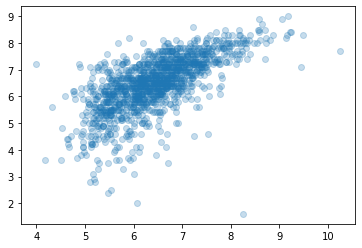

In [38]:
plt.scatter(preds, np.array(y_test).flatten(), alpha=0.25) # some correlations going on here but definitely not linear

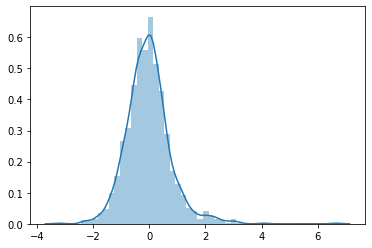

In [39]:
errors = preds - np.array(y_test).flatten()
sns.distplot(errors) # We expect the distribution to be normal around zero!

### 3. Predict Profitability

In [105]:
# X remains the same, but labels are now y2
X_train, X_test, y_train, y_test = train_test_split(normed_X, y2, test_size=0.33, random_state=42)

In [116]:
model2 = tfk.Sequential([
    #tfk.Input(shape=(25,)),
    #tfkl.BatchNormalization(), # normalise data here
    tfkl.Dense(128, activation='selu', input_shape=[X_train.shape[1]]),
    tfkl.Dense(64, activation='selu'),
    tfkl.Dense(32, activation='selu'),
    tfkl.Dense(1)
])

model2.compile(optimizer=tf.optimizers.Adam(1e-2), loss=tfk.losses.mean_squared_error, metrics=["mse", "mae"])
model2.fit(np.array(X_train), np.array(y_train), validation_split=0.2, batch_size=100, 
          epochs=500, workers=10, use_multiprocessing=True)

Train on 2078 samples, validate on 520 samples
Epoch 1/500
2078/2078 [==============================] - 0s 227us/sample - loss: 30441871166410.5547 - mse: 30441870458880.0000 - mae: 455934.4375 - val_loss: 4133470176832.0000 - val_mse: 4133470076928.0000 - val_mae: 158813.2812
Epoch 2/500
2078/2078 [==============================] - 0s 28us/sample - loss: 30441083238769.4961 - mse: 30441081929728.0000 - mae: 456364.0000 - val_loss: 4132651010476.3076 - val_mse: 4132651139072.0000 - val_mae: 160104.9844
Epoch 3/500
2078/2078 [==============================] - 0s 29us/sample - loss: 30434072439666.2578 - mse: 30434071150592.0000 - mae: 460131.4062 - val_loss: 4127258251406.7690 - val_mse: 4127258050560.0000 - val_mae: 168585.2031
Epoch 4/500
2078/2078 [==============================] - 0s 27us/sample - loss: 30404950675290.1797 - mse: 30404950097920.0000 - mae: 475730.7188 - val_loss: 4112720996804.9229 - val_mse: 4112721117184.0000 - val_mae: 194576.2656
Epoch 5/500
2078/2078 [=========

In [117]:
preds2 = model2.predict(X_test).flatten()

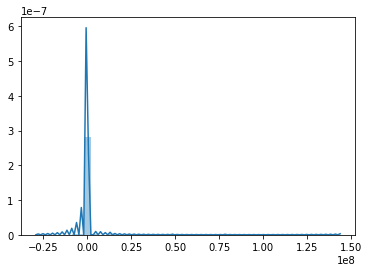

In [118]:
errors2 = preds2 - np.array(y_test).flatten()
sns.distplot(errors2) # We expect the distribution to be normal around zero!

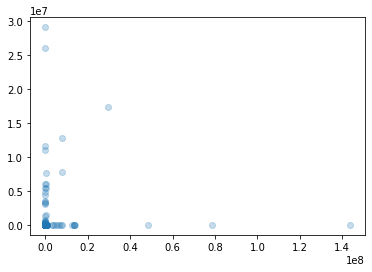

In [119]:
plt.scatter(preds2, np.array(y_test).flatten(), alpha=0.25)